# **Colabユーザーの皆さまへ**

# **このファイルに直接書き込まないでください—作業内容が消えるかもしれません！**

# **作業を始める前に必ずコピーを作成してください。**

コピーの作り方

1. 左上の「File」をクリック。
> *もし「File」や「Runtime」などのメニューが見当たらない場合は、右上の「v」マークをクリックして表示させてください。*

2. 「Save a copy in Drive」を選択

3. コピーしたファイル名を「YOURNAMEs\_FileName.ipynb」に変更してください。
> 例：名前がOliviaなら → Olivias_FileName.ipynb



---

* チェックマーク（✅）は保存されません。Chromeのリロードボタンでページを更新すると消えます。<br>
後で続きからやりたい場合は、テキストセルを追加して「SO FAR DONE」など書いておいてください。

---

* Colabでは、**30分〜90分ごとに以前の出力がリセットされます**。<br>
そのため、`~~ is not defined`のエラーが**頻繁に**起こります。

  🔁 `~~ is not defined` エラー対処法
  1. まず、変数名のスペルをよく確認してください。<br>
  2. スペルが正しいのにエラーが出るなら、**再起動したいセルをクリック**。<br>
  3. 左上の「Runtime」→「Run before」をクリック。<br>
    → これで**それまでのすべてのセルが再実行されます**。
  4. もう一度セルを実行してください。

  もしこの手順をやってもエラーが出るなら、<br>
  以前のセルでのTODO回答に基本的なミスがあるかもしれません。<br>
  答えをよく見直してください。<br>
  またはChatGPTなどのサポートに相談してください。

# **Chapter 1: Dataloader**

テキストをそのまま扱うことはできません。<br>
だから、テキストを数字に変換する必要があります。<br>
この章では、各文字にIDを割り振ります。<br>
ちょっと面倒に感じるかもしれませんが、がんばって！

### **Section 0: Preparation**

このセクションでは、前のChapterから内容を読み込むだけです。<br>
コードはそのまま実行してください。読む必要はありません。<br>
気軽に先に進んでOKです。<br>

In [ ]:
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt

# utf-8でダウンロードしたばかりのinput.textというファイルを読み込みます。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

In [ ]:
# テンソルを見やすく表示する関数（スキップしても構いません）

import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
        A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("名前", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """
    
    # 引数からテンソルと名前を判別する
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Tensorをリストに変換する
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """再帰的にネストされたリストを整形して文字列を返す"""
        # 内容がリストの場合は再度返す
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # 番号付きリストの場合
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # フォーマット済み文字列（最外枠の角括弧は削除されます）
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # 結果出力
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("テンソル([")
    print("" * 9 + inner_formatted)
    print("コードコメントとコンソール出力の翻訳を専門とするプロの翻訳者です。" * 7 + "])")

### **Section 1: __init__(1)**

**まず、例文「Hello World!」の文字リストを作ってみましょう。**  
- 入力: 'Hello World!'  
- 出力: [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']

[Watch the video!](https://youtu.be/PTbVZC-R2kY)
- 10秒、音声なし

In [ ]:
# Colabユーザーはこのコードを実行するだけで動画を視聴できます。
from IPython.display import HTML
video_id = "PTbVZC-R2kY"
HTML(f"""<div style="text-align: center;"><iframe width="700" height="300"
        src="https://www.youtube.com/embed/{video_id}?autoplay=0&modestbranding=1&showinfo=0&rel=0&controls=1"
        frameborder="0" allowfullscreen></iframe></div>""")

- 文字列 'Hello World!' を変数 `example_text` に保存してください。

In [ ]:
example_text = # TODO: 文字列 'Hello World!' を格納します。簡単な作業です。
print("例文：", example_text)

**`Check Point`** <label><input type="checkbox">例文：Hello World!

「!」が含まれていることを確認し、「,」など余計な文字が入っていないかチェックしましょう。
</label>

```
Function: set
Argument: example_text
```

- `set`関数は文字列から重複しない要素を取り出します。

In [ ]:
unique_chars = # TODO: 文字列から重複しない要素を抽出します。
print("ユニークな文字:", unique_chars)

```
Function: list
Argument: 自分で考えろ
```

- `list` 関数は  をリストに変換します。

In [ ]:
listed_chars = # TODO: データをリストに変換します。
print("一覧の文字：", listed_chars)

```
Function: sorted
Argument: 自分で考えろ
```
- `sorted`関数はデータを昇順に並べ替えます。

In [ ]:
sorted_chars = # TODO: 昇順に並べ替えます。
print("ソートされた文字:",sorted_chars)

感嘆符を必ず含め、合計で9つの要素があることを確認してください。

In [ ]:
print(len(sorted_chars))

**`Check Point`** <label><input type="checkbox" id="task1"> ソート済みの文字: [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']</label>

念のため復習しましょう。

シェイクスピアの全文を読み込みます。

In [ ]:
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt

# utf-8でダウンロードしたinput.textというファイルを読み込みます。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

- Shakespeareの全文テキスト`text`に`set`、`list`、`sorted`を適用します。<br>
これで`chars`という文字のリストが作られます。

In [ ]:
unique_chars_text = # TODO: セット
listed_chars_text = # TODO: リスト
chars = # TODO: ソート済み
print('文字:', chars)

**`Check Point`** &nbsp; <label><input type="checkbox" id="task1">

文字一覧: ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
</label>

```
Function: len
Argument: Think for yourself
```
- `len` はリストの長さを表示します。

In [ ]:
# charsリストに含まれる文字数を調べる
vocab_size = # TODO: len(list name)の長さ
print("文字の語彙数は：", vocab_size)

**`Check Point`** <label><input type="checkbox" id="task1"> 文字の語彙数は：65</label>

**Chapter1: Section 1: __init__** <label><input type="checkbox"> Mark as Done</label>

##### **IMPORTANT⚠️**

Colabでは、チェックポイントのチェックマークは現在のランタイムセッションでのみ保存されます。

後で再起動すると、チェックマークは消えてしまいます。

進捗を残すには、テキストセルを追加して「DONE SO FAR!」などとメモを書いておくと便利です。

### **Section 2: Encode**

このセクションでは、私たちは…

**文字列をIDに変換する**  
  - 入力（使う素材）：'Hello World!'  
  - 出力（目標結果）：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]


**まず、テキストの文字をIDに変換する辞書 `char_to_id` を作りましょう。**

[Watch the video!](https://youtu.be/9yk4jsYl7mU)
- 25秒、音声なし
- video_id = "9yk4jsYl7mU"

In [ ]:
# Colabユーザーはこのコードを実行して動画を視聴できます。
from IPython.display import HTML
video_id = "9yk4jsYl7mU"
HTML(f"""<div style="text-align: center;"><iframe width="700" height="300"
        src="https://www.youtube.com/embed/{video_id}?autoplay=0&modestbranding=1&showinfo=0&rel=0&controls=1"
        frameborder="0" allowfullscreen></iframe></div>""")

```python
for index, char in enumerate(Think_for_yourself):
    print(f"Index: {index}, Character: {char}")
```
`enumerate`はリストから位置の`index`と要素の`char`を1つずつ順番に取り出します。


In [ ]:
# 文字リストの例として、文字列 'Hello World!' のリストを示します。
example_chars = [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']

for # TODO: シーケンスのインデックスと要素の文字を同時に生成する
    print(f"index:{index}, char:{char}") # 作成されたペアを表示

**`Check Point`** <label><input type="checkbox"> ← 上の結果が以下の答えと一致したらチェックしてください

index:0, char: <br>
index:1, char:!<br>
index:2, char:H<br>
index:3, char:W<br>
index:4, char:d<br>
index:5, char:e<br>
index:6, char:l<br>
index:7, char:o<br>
index:8, char:r<br>
</label>

**今回は、文字リストのインデックスをその文字を表すIDとして扱います。**

```python
# 文字をインデックスに対応させる辞書を作成
char_to_id = {
    char: index for index, char in enumerate(THINK_FOR_YOURSELF)
}
```

- `character_list`から順番である`index`と対応する`char`を一緒に取り出し、{`char`: `index`} のペアで辞書を作成します。


In [ ]:
# TODO: 文字をインデックスにマッピングする辞書を作成する
char_to_id =

print('文字からインデックスへの辞書:\n', char_to_id)

```python
for char in example_text:
    print(char) # 現在処理中の文字
    print(char_to_id[char])  # 文字に対応するID番号
```
'Hello World!' を、辞書 char_to_id を使ってID番号の列に変換しましょう。

文字は順番に取り出します。例えば `H`, `e` といった具合です。

そして辞書 `char_to_id` を使って `char` を、その文字を表す番号（ID）に変換します。

In [ ]:
example_text = 'Hello World!'

# TODO: example_text 辞書 char_to_id を使って 'Hello World' を数値に変換する
for char
    print # TODO: 現在処理中の文字
    print # TODO: 文字charに対応するID番号

```python
def encode(string):
    chars_encoded_list = [ char_to_id[char] for char in string ]
    return chars_encoded_list
```

* `encode`という関数を作りましょう。文字列を受け取って、IDのリストに変換します。
* 文字`char`ごとに`char_to_id[char]`でIDを取得して、それをリストに追加します。  
* 最後に、その文字列の全ての文字をIDに変換したリストを返します。


In [ ]:
def encode(string): # 文字列データを引数として受け取る
    chars_encoded_list = # TODO: 文字列string内のすべての文字を順番にIDに変換します。char_to_idを使うことができます。
    return chars_encoded_list

# 文字列としてexample_text('Hello World!')を使います。
example_text_encoded = encode(example_text)
print('Hello World! をIDに変換しました:', example_text_encoded)

チェックポイント<label><input type="checkbox">Hello World!をIDに変換しました：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]</label>

**Chapter1: Section2: Encode** <label><input type="checkbox"> Mark as Done</label>

### **Section 3: Decode**

このセクションでは、以下を目指します…

**ID番号の列から文字列を再構築する**  
  - 入力（使用する素材）：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]  
  - 出力（期待する結果）：'Hello World!'  

---

```python
id_to_char = { index:char for index, char in enumerate(example_chars) }
```

- `example_chars`から、`index`と対応する`char`を同時に取り出して、{`index`: `char`}のペアを作る辞書を作成します。


In [ ]:
# character_listには「Hello World」の文字が含まれており、昇順に並べられています。
example_chars = [' ', '!', 'H', 'W', 'd', 'e', 'l', 'o', 'r']

id_to_char = # TODO: {index: char} の組み合わせを使って辞書を作成する
print('ID番号を文字に変換する辞書', id_to_char)

```python
for id in ID_number_list:
    print(id)  # 処理中の現在のIDを表示
    print(THINK_FOR_YOURSELF)  # 辞書id_to_charを使ってID `id` に対応する文字を表示しましょう。ヒント：前のセクション
```
* 各ID `id` は `ID_number_list` から1つずつ取り出され、辞書 `id_to_char` を使って対応する文字に変換されます。


In [ ]:
# ID番号の列は、前のセクションで取得した「Hello World!」のID番号を使用しています。
example_ids = [2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]

for id in example_ids:
    print(id) # 現在処理中のID番号
    print # TODO: ID番号 `id` の文字を出力する

```python
def decode(ids):
    ids_decoded_list =  # IDを文字に変換します。ヒント：前の章
    return ids_decoded_list
```
- `decode`関数はIDを入力として受け取り、文字列を再構築します。
- 入力された`ids`の各IDを一つずつ処理します。<br>
`id_to_char[id]`を使って、それぞれのIDに対応する文字を取得します。<br>
取得した文字をリストに追加します。<br>
最後に、IDから変換したすべての文字が入ったリストを返します。


In [ ]:
def decode(ids):
    ids_decoded_list = # TODO: IDを文字に変換します。ヒント: 前のセクション
    return ids_decoded_list

前のセクションのID番号をID番号の列に使います：[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] （'Hello World!'の分）。  
`decode`関数が、これらのIDから元の文字を復元できるか確認しましょう。

In [ ]:
example_ids = [2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]
example_ids_decoded = decode(example_ids)
print('[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1]を文字に変換する', example_ids_decoded)

```python
# char_listから1文字ずつ取り出して文字列に変換する
ids_decoded_str_list = [str(char) for char in THINK_FOR_YOURSELF]
```
- 復号された文字のリストから1文字ずつ取り出し、型をstrに変換します。

In [ ]:
ids_decoded_str_list = # TODO: デコード済みの文字をstr型に変換する
print(ids_decoded_str_list)

```python
# 各文字の周りの引用符(`)を取り除いて結合する。
ids_decode_joined_string = ''.join(THINK_FOR_YOURSELF)
```
- これはリストから1文字ずつ`char`を取り出し、<br>
  周りの引用符を外して結合しています。

In [ ]:
ids_decoded_joined_string = # TODO: 文字を囲む''を取り除いて接続してください。
print(ids_decoded_joined_string)

ここまでの流れをまとめて、ID列からテキストを復元する`decode`という関数を作成しましょう。

```python
def decode(ids):
    # ID列を文字列のリストに変換する
    ids_decoded_list =
    # 文字列リストから一文字ずつ取り出し、str型に変換する
    ids_decoded_str_list =
    # 文字のまわりの''を取り除き、文字をまとめて一つの文字列にする
    ids_decode_joined_string =
    return ids_decode_joined_string
```
- 文字列リストから一文字ずつ`char`を取り出し、順に`str`型に変換して、<br>文字の周りの引用符`''`を除きながらまとめてつなげる。


In [ ]:
def decode(ids):
    ids_decoded_list = # TODO: ID文字列を文字列に変換します。id_to_charを使用できます
    ids_decoded_str_list = # TODO: 各要素の文字charを順に取り出し、str型に変換します
    ids_decode_joined_string = # TODO: 文字を囲む''を取り除いて接続してください。
    return ids_decode_joined_string

# example_ids、[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] をID番号の列として使用します。
example_ids_decoded_joined_str = decode(example_ids)
print('[2, 5, 6, 6, 7, 0, 3, 7, 8, 6, 4, 1] は文字列に変換されました', example_ids_decoded_joined_str)

**`Preprocessing Chapter: Section 4 "Convert IDs to Characters"`** <label><input type="checkbox" id="task1"> mark as done</label>

ここまで完了

### **Section 4: __init__(2)**

念のため復習しましょう。

シャイクスピアのテキスト `text` から取った文字を並べ替えて作ったリスト `chars` を使います。  
中身を確認してみましょう。

In [ ]:
print('文字：\n', chars)
print("chrasの語彙数", len(chars))

```python
char_to_id = {char: index for index, char in enumerate(THINK_FOR_YOURSELF)}
```

- `index`と`char`を同時に取り出して、文字からIDへの辞書を作成します。
- 辞書は各`char`をその`index`と対応させます。{`char`: `index`}の形です。


In [ ]:
# {char:indx}
char_to_id = # TODO: {char: index} の組み合わせを使って辞書を作成する
print('char_to_id', char_to_id)

**`Check Point`** <label><input type="checkbox" id="task1">

char_to_id {'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}

</label>

```python
id_to_char = { index:char for index, char in enumerate(THINK_FOR_YOURSELF) }
```

- 順番の`index`と対応する`char`を同時に取り出して、{`index`: `char`}のペアでidから文字への辞書を作成します。


In [ ]:
id_to_char = # TODO: {index: char}の組み合わせを使って辞書を作成する
print('id_to_char', id_to_char)

**`Check Point`**
<label><input type="checkbox" id="task1">

id_to_char {0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: "'", 6: ',', 7: '-', 8: '.', 9: '3', 10: ':', 11: ';', 12: '?', 13: 'A', 14: 'B', 15: 'C', 16: 'D', 17: 'E', 18: 'F', 19: 'G', 20: 'H', 21: 'I', 22: 'J', 23: 'K', 24: 'L', 25: 'M', 26: 'N', 27: 'O', 28: 'P', 29: 'Q', 30: 'R', 31: 'S', 32: 'T', 33: 'U', 34: 'V', 35: 'W', 36: 'X', 37: 'Y', 38: 'Z', 39: 'a', 40: 'b', 41: 'c', 42: 'd', 43: 'e', 44: 'f', 45: 'g', 46: 'h', 47: 'i', 48: 'j', 49: 'k', 50: 'l', 51: 'm', 52: 'n', 53: 'o', 54: 'p', 55: 'q', 56: 'r', 57: 's', 58: 't', 59: 'u', 60: 'v', 61: 'w', 62: 'x', 63: 'y', 64: 'z'}

</label>

`encode`という関数を実装してください。これは文章を一文字ずつ取り出してID番号のリストに変換します。

In [ ]:
# コードを読んで実行してください。
def encode(string):
  chars_encoded_list = [char_to_id[char] for char in string]
  return chars_encoded_list

example_encoded = encode("Let's he")
print(example_encoded)

**`Check Point`**
<label><input type="checkbox">[24, 43, 58, 5, 57, 1, 46, 43]
</label>

ID番号の列の各要素を`str`型に変換し、`''`を取り除いて結合し、その後文をデコードする関数を実装してください。

In [ ]:
# コードを読んで実行してください。
def decode(ids):
    decoded_ids = [str(id_to_char[id]) for id in ids]
    decoded_ids_joined_str = ''.join(decoded_ids)
    return decoded_ids_joined_str

example_decoded_joined_str = decode([24, 43, 58, 5, 57, 1, 46, 43])
print(example_decoded_joined_str)

**`Check Point`**  
<label><input type="checkbox">Let's he
</label>

- input.txtのすべての文章`text`を`encode`して、ID番号のリストに変換し、`text_ids`に保存しましょう。

In [ ]:
text_ids = # TODO: 先ほど定義したencode関数を使ってください。
print(text_ids)

テキストが長すぎて表示できないので、最初の100文字を抽出しましょう。

In [ ]:
text_ids_100 = # データの先頭から100文字。
print('100 個のID', text_ids_100)

```python
import torch
data = torch.tensor(THINK_FOR_YOURSELF, dtype=torch.long)
```

* PyTorchライブラリの`torch`をインポートします。
* IDのリストから型を`long`（整数）にしてテンソル（PyTorchの数値データ構造）を作成します。

In [ ]:
# シェイクスピアの全文をIDに変換し、その後Pytorchのテンソルに変換してdataに保存する
import # TODO: PyTorchライブラリtorchをインポートする
data = # TODO: フルIDをテンソルに変換してdataに保存する
print('データ\n', data)

**`Check Point`**  
<label><input type="checkbox" id="task1">シェイクスピアの全文をすべてIDに変換し、それをPyTorchのテンソルにして保存する

 tensor([18, 47, 56,  ..., 45,  8,  0])
</label>

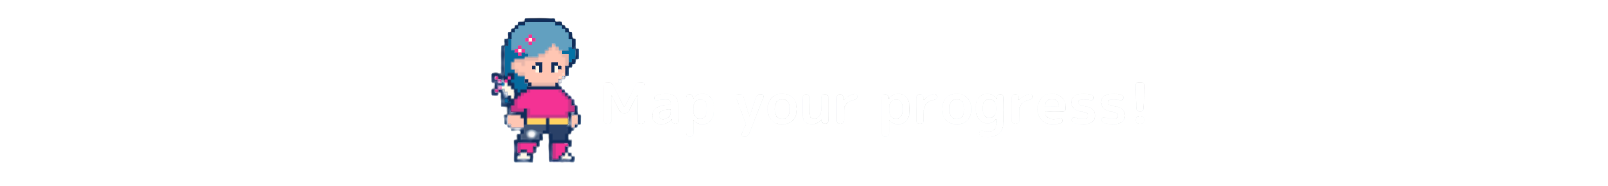

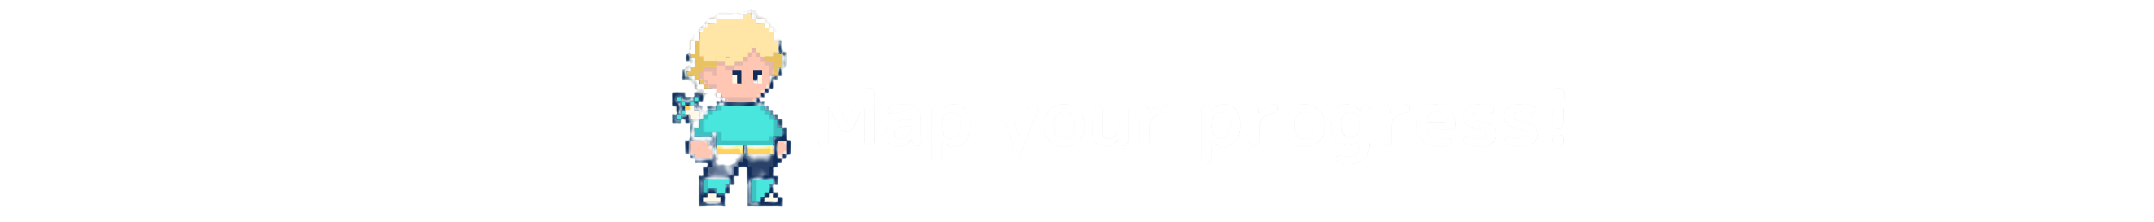

#### IMPORTANT⚠️

Chapter 0でTensor Mapをすでにコピーしていることを必ず確認してください。

まだの場合はChapter 0の「How to Use this tutorial」セクションをチェックしてください。

[Watch the video!](https://youtu.be/-nQy8YespvQ)
- 2分、無音
- video_id = "-nQy8YespvQ"


**部分スクリーンショットとコピー**  

Macの場合… `Cmd + Ctrl + Shift + 4`  
Windowsの場合… `Windows key + Shift + S`

**Canvaにペースト**  
Macの場合… `Cmd + V`  
Windowsの場合… `Ctrl + V`

⚠️ 注意: Canvaにペーストすると画面シートの中央に貼り付けられます。  
そのため、画面から消えて見えなくなることがあります！<br>  

シートの中央に移動してから、好きな場所にドラッグしてください。<br>

コツ:<br>
1 スクリーンショットを貼り付ける前にズームアウトして、地図の中心を表示させる。<br>
2 ペースト後はズームレベルを変えずにそのままにする。<br>
3 スクリーンショットをだいたい正しい場所に動かす。<br>
4 左上の角をドラッグしてサイズを小さくする。<br>
5 位置を微調整するために再度ズームアウトする。<br>
6 スライダーを使って画像を正確に動かす。<br>
7 横方向のスライダーは見えにくいけど便利です。<br>

**Chapter 1: Section 4** <label><input type="checkbox"> Mark as done</label>

### **Section 5: split_data**

Shakespeareのinput.txtの長さを測る（スペースを含むすべての文字をカウントする）

In [ ]:
print # TODO: dataの長さを表示する

**`Check Point`** <label><input type="checkbox">1115394</label>

データを9:1の割合で訓練用と検証用に分割してください。


```python
split_index = int(THINK_FOR_YOURSELF)  # 分割点のインデックス
train_data = data[:split_index]  # 左側を空欄にすると開始からという意味
val_data = data[split_index:]  # 右側を空欄にすると最後までという意味
```
- 全データの長さに学習データの割合（今回は0.9）をかけて<br>
  intで整数化し、分割点`split_index`を求める。

- データの開始から`split_index`の手前までを学習データに、<br>
  `split_index`から最後までを検証データとして使う。

In [ ]:
# すべてのデータを9:1の割合で訓練データと検証データに分割する
split_index =  # TODO: 分割点のインデックスを計算します。
train_data = # TODO: `split_index`の前までの開始からの訓練データ（空白で表現）
val_data = # TODO: `split_index`から末尾までの検証データ（空白で表現）

print('分割点インデックス', split_index)
print('学習データの長さ', len(train_data))
print('検証データの長さ：', len(val_data))

**`Check Point`**  
<label><input type="checkbox"><br>
分割ポイントインデックス 1003854<br>
学習データの長さ 1003854<br>
検証データの長さ 111540<br>
</label>

In [ ]:
print("train_data\n", train_data) # トレーニングデータ全体を表示する

In [ ]:
print("val_data\n", val_data) # 検証データ全体を表示する

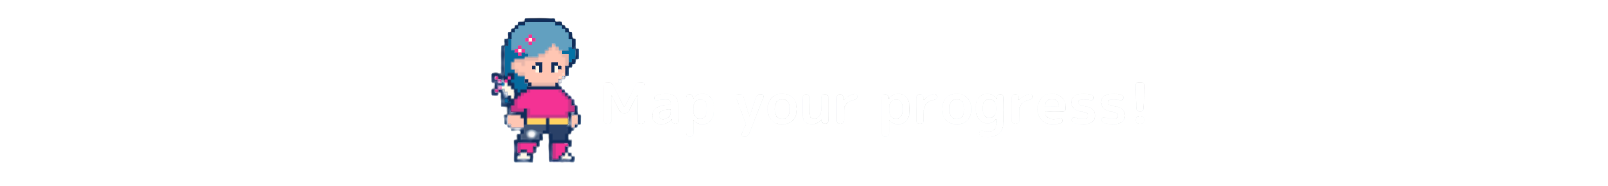

**Section 5: split_data** <label><input type="checkbox">Mark as Done</label>

### **Section 6: get_batch**

**入力コンテキストと出力ターゲットのペアを作成する (1)**

すべてのAIモデルには入力と出力があります。では、言語モデルの入力と出力は何でしょうか？

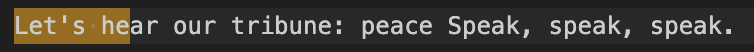

input.txtからランダムに8文字を抽出します。例えば、サンプルとして「Let's he」を使いましょう。

ここで作成する「Bigram Language Model」は、入力された文字列を受け取り、一文字分ずらした文字列を出力します。

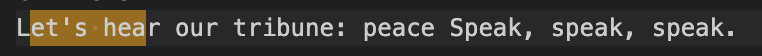

入力は8文字のシーケンスです。目的は、それぞれの文字の次に来る文字を予測することです。<br>
例えば、入力が"Let's he"なら、ターゲット出力は"et's hea"になります。<br>
つまり、8文字の入力に対して、8文字の対応する出力を生成します。<br>
入力文字列とターゲット出力文字列はどちらも単語IDとしてエンコードされています。

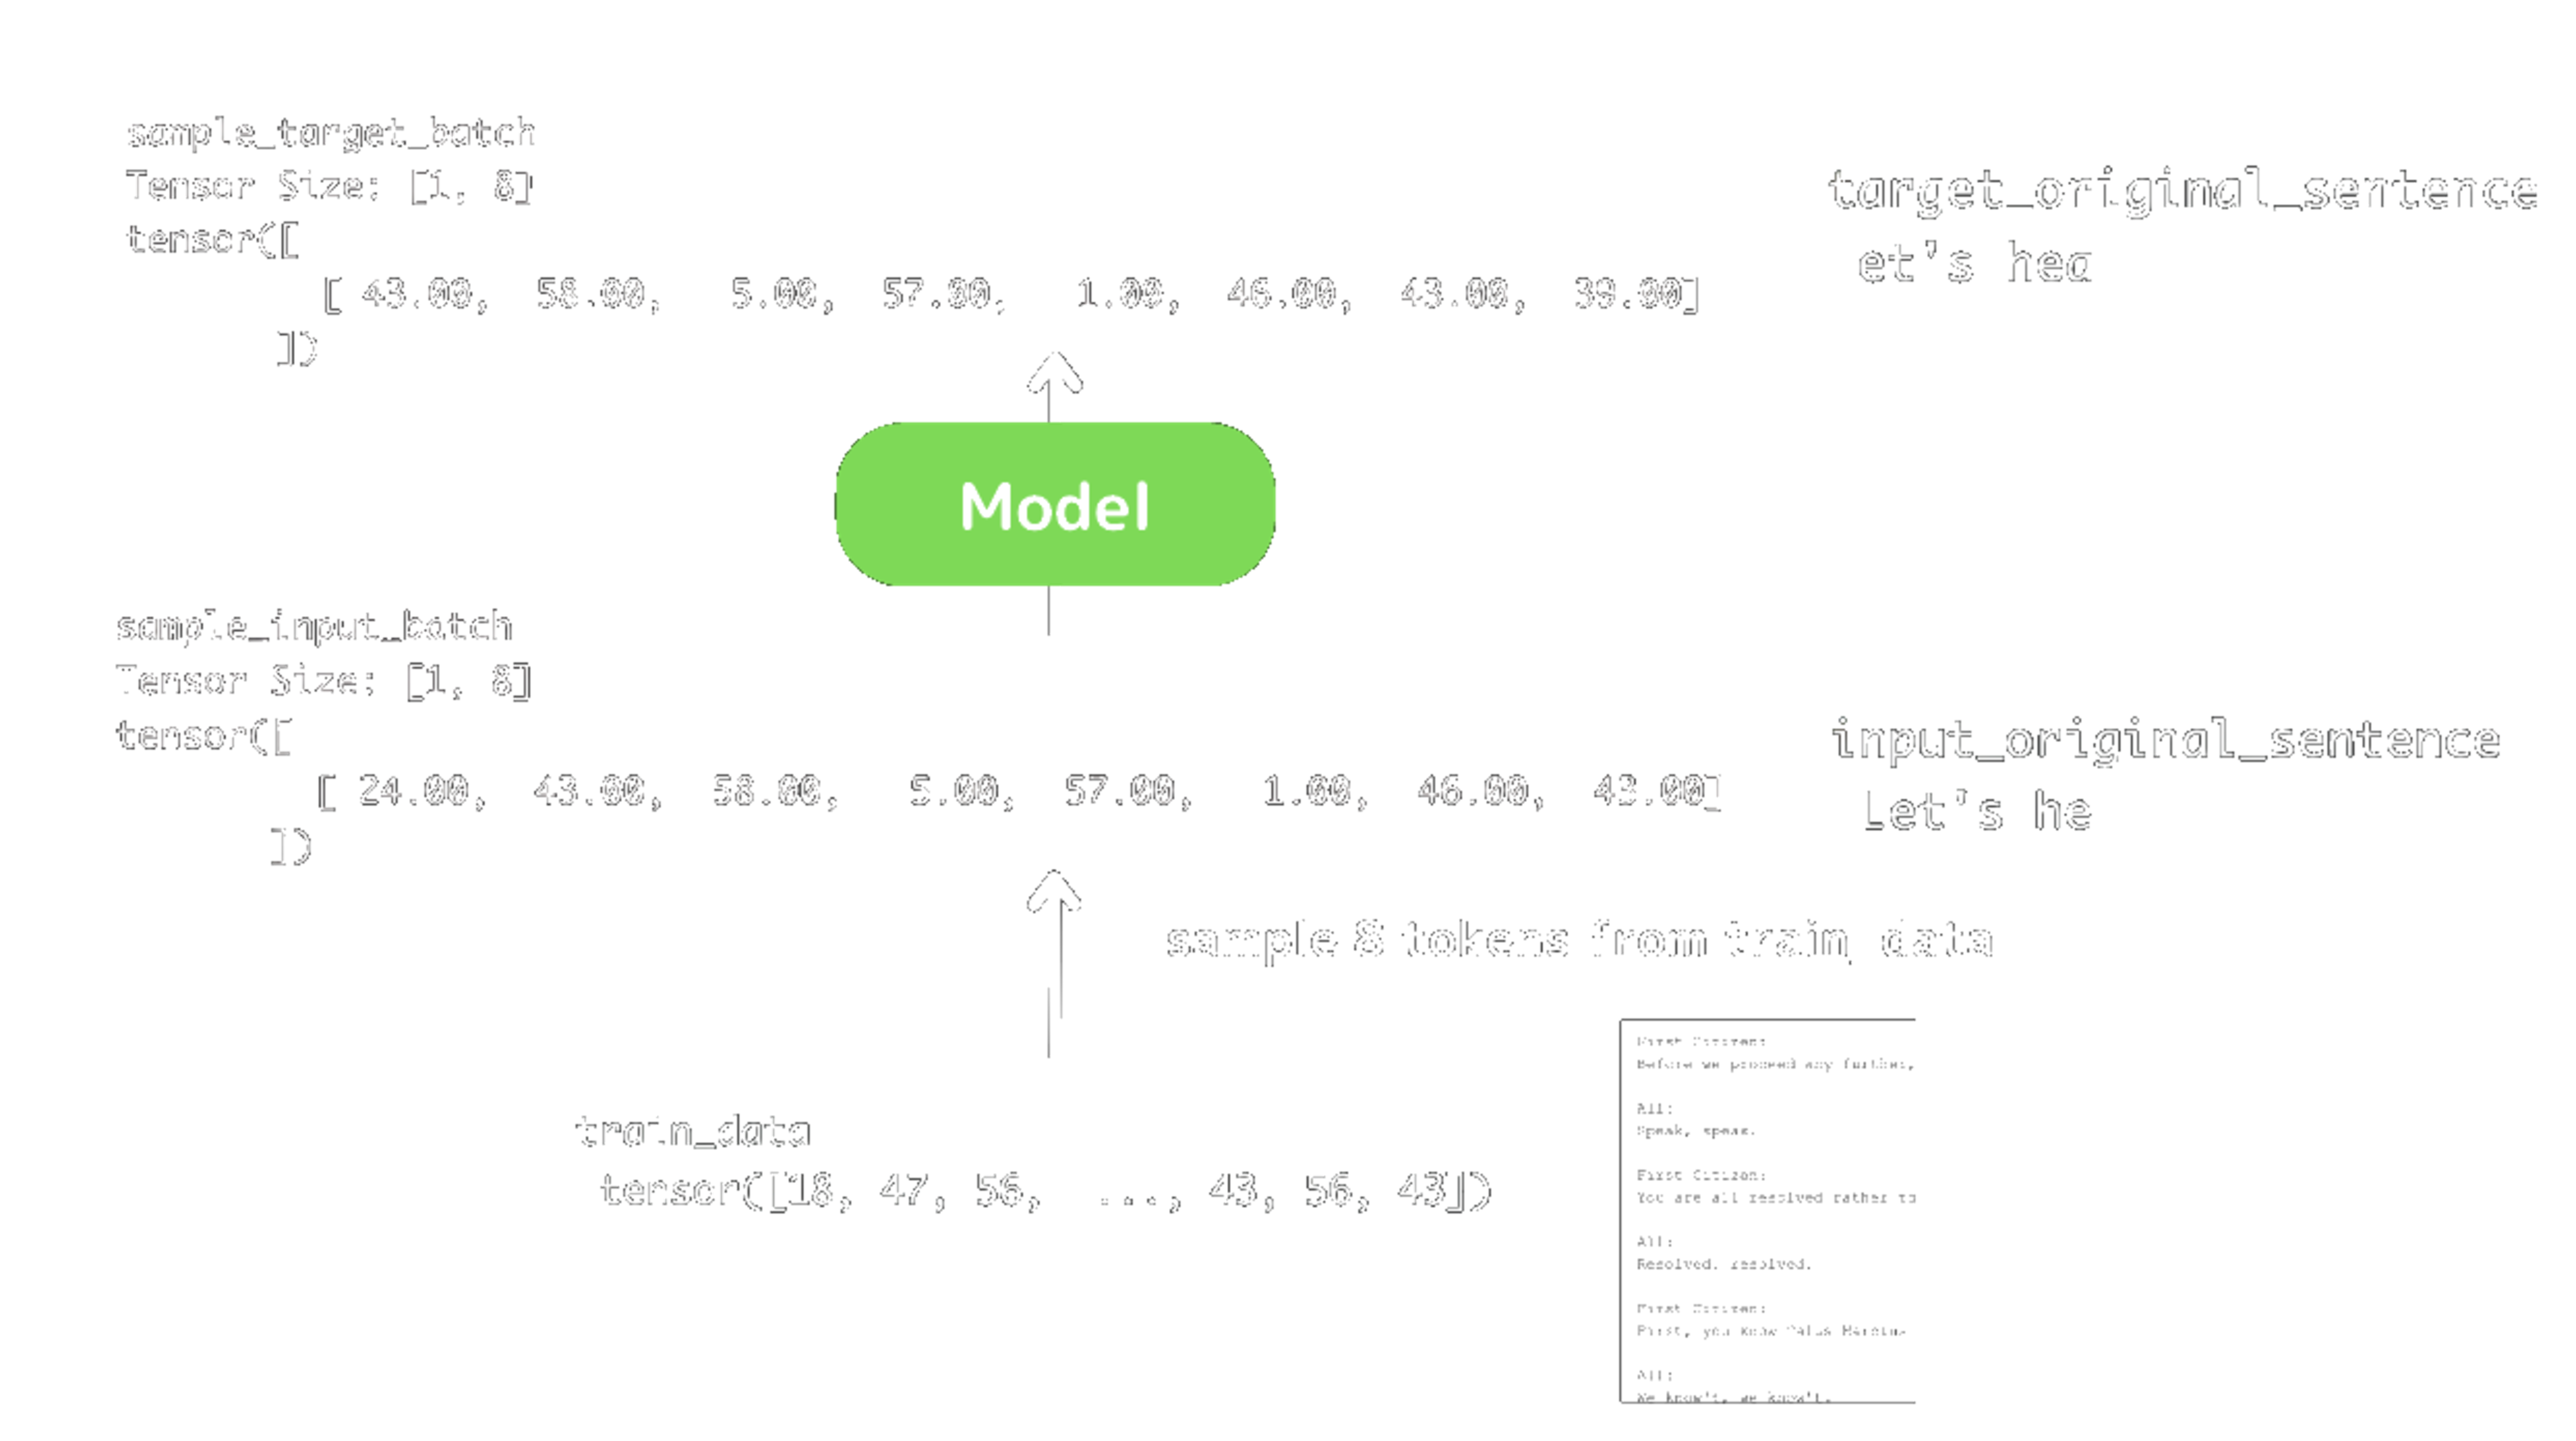

入力は8文字のシーケンスで、各文字の次に来る文字を予測するタスクです。  
8文字すべてに対して**8つの出力文字を予測する**ほうが、8文字の入力に対して1文字だけ予測するよりも効率よく学習できます。

一度に処理するトークン（文字や単語）の数を`block size`と呼びます。<br>これが大きいほど、モデルはより長い文脈を学習できます。<br>ただし、その分計算リソースも多く必要になります。

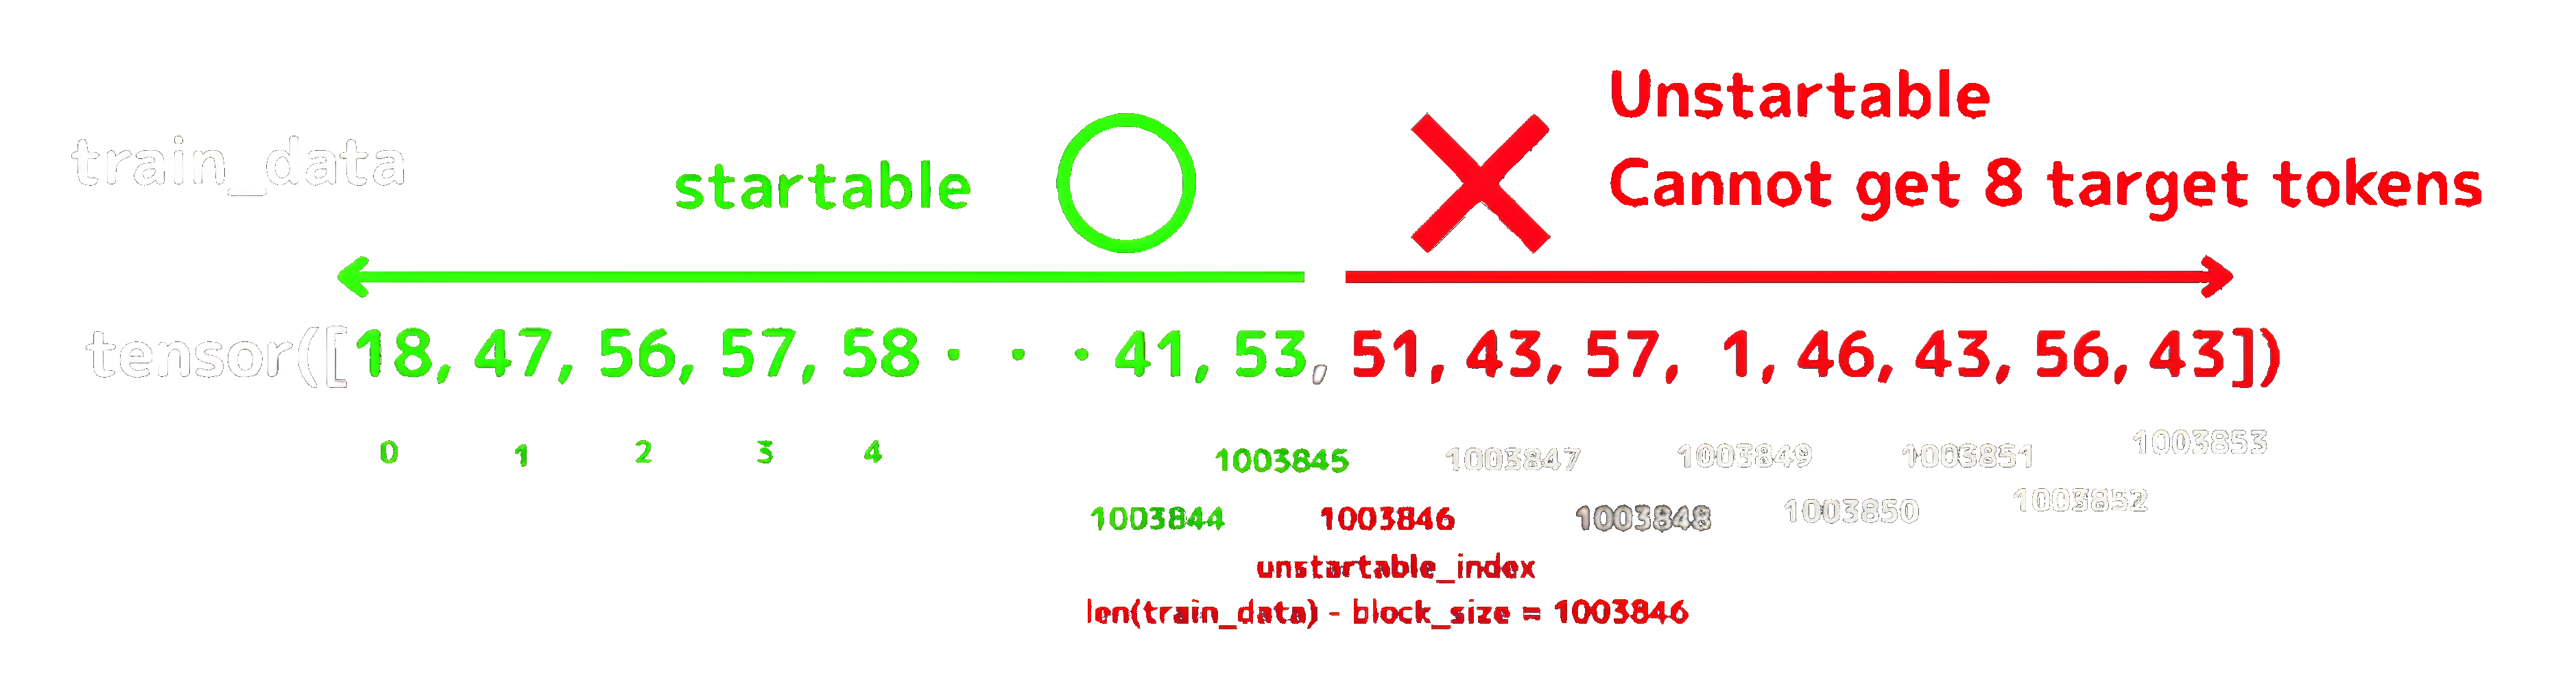

学習データからランダムにスタート地点を選びます。<br>8つの出力ターゲットを取れる十分な余裕があるか確認しましょう。

In [ ]:
block_size = 8
unstartable_index = # TODO: 上の図を使ってunstartable_indexを計算する
print("起動不能なインデックス", unstartable_index)

ランダムインデックスを生成する

```python
Function: torch.randint
Arguments: (low, high, shape ((1,)))
```
- `torch.randint(a, b, (1,))` は、a（含む）からb（含まない）までの範囲でランダムに1つの整数を生成します。  
- `(1,)` は要素が1つのテンソルを返すようにします。

In [ ]:
torch.manual_seed(1337) # シード値は1337です
random_start_index = # TODO: 関数（下限、上限、形状）を適用する
print('シーケンス抽出開始インデックス：', random_start_index)

**`Check Point`**  
<label><input type="checkbox">  
シーケンス抽出開始インデックス: tensor([76049])  
</label>

上限のバンド b は範囲に含まれません。`unstartable_index` を直接使えます。

`torch.manual_seed(1337)` はPyTorchの乱数生成を固定します。<br>
同じシードを使うと、同じランダムな順番を再現できます。<br>
形状を `(4,)` に指定してみましょう。これは要素が4つのテンソルを作ります。

In [ ]:
torch.manual_seed(1337) # シード値は1337です
random_start_index = # TODO: 関数（下限、上限、形状）を適用する
print('シーケンス抽出開始インデックス：', random_start_index)

**`Check Point`**  
<label><input type="checkbox">  
最初に生成された数字が1要素生成のときと同じであることを確認した  
</label>

元の単一要素に戻りましょう。

In [ ]:
torch.manual_seed(1337)
batch_size = 1
random_start_index = # TODO: バッチサイズ分のサンプルのみ取得する
print('シーケンス抽出開始インデックス：', random_start_index)

1. `input_sequence` の作成（スライスを使う）

```python
Data: train_data
Start index: random_start_index
End index: random_start_index + block_size
```
- `input_sequence` はモデルの入力として使うシーケンスデータです。


In [ ]:
input_sequence = # TODO: データを適用 [開始インデックス: 終了インデックス]
print("ランダム開始インデックス", random_start_index)
print_formatted_tensor("入力シーケンス", input_sequence)

ID列をデコードすると元の文字列が得られます。

In [ ]:
original_sentence = decode(input_sequence.tolist())
print("元の文", original_sentence)

**`Check Point`** <label><input type="checkbox"><br>
original_sentence<br>
Let's he<br>
</label>

2. `target_sequence`の作成（シフトしたスライス）

```python
Data: train_data
Start index: THINK_FOR_YOURSELF
End index: THINK_FOR_YOURSELF
```
- これは次のトークンを予測するためのターゲットシーケンスです。

In [ ]:
target_sequence = # TODO: データを適用 [開始インデックス: 終了インデックス]
print("ターゲットシーケンス")
print_formatted_tensor(target_sequence)

**Section 6: get_batch** <label><input type="checkbox"> Mark as done</label>

### **Section 7 クラスの定義**

In [ ]:
# モデル設定を保存する設定クラス
class ModelConfig:
    input_sequence_length = 8  # 入力データの長さ（シーケンス長）
    batch_size = 1 # バッチサイズ（get_batchメソッドで同時に取得するサンプル数）
    device_type = 'cuda' if torch.cuda.is_available() else 'cpu'  # 使用するデバイス（GPUまたはCPU）

In [ ]:
config = ModelConfig() # ModelConfigインスタンスを作成しています。設定パラメータ（コンストラクタ）はありません。
print("config.input_sequence_length", config.input_sequence_length) # config.input_sequence_length
print("config.batch_size", # TODO: config.batch_size
print("config.device_type", # TODO: config.device_type

🔘 **Options**: 必要ない余分なオプションが含まれているかもしれません。

`sorted` `enumerate` `self.ctoi` `self.encode` `self.split_data` `int` `float` `self.config` `self.config.input_sequence_length` `zip`


In [ ]:
class DataLoader:
    def __init__(self, text, config):
        self.config = config  # 設定オブジェクト
        chars = ______(list(set(text)))  # TODO: 一意の文字をソートする
        self.ctoi = {char: index for index, char in enumerate(chars)}
        self.itoc = {index: char for index, char in _________(chars)} # TODO: 
        self.vocab_size = len(chars)

        # エンコードしてテンソルに変換します。
        # `self.` は、この `__init__` メソッド外の他のメソッドや引数を呼び出すために必要です。
        self.data = torch.tensor(_________(text), dtype=torch.long) # TODO: 

        # 訓練データと検証データに分割する。
        # 引数が指定されなくても、デフォルトで`self.data`が使用されます。
        self.train_data, self.val_data = self.split_data()

    def encode(self, text):
        # 文字列をインデックス列に変換します。`self.`は他のメソッドや引数を呼び出す際に必要です。
        return [___________[c] for c in text]  # TODO: 

    def decode(self, indices):
        return ''.join([self.itoc[i] for i in indices])

    def split_data(self):
        split_index = ___(0.9 * len(self.data))  # TODO: データの90％を訓練用に分割するポイント。
        return self.data[:split_index], self.data[split_index:]

    def get_batch(self, split):
        data = self.train_data if split == 'train' else self.val_data
         # 抽出開始インデックスを生成する
        start_indices = torch.randint(len(data) - ______________________, (self.config.batch_size,)) # TODO: 

        input_sequences = torch.stack([
            data[start_index:start_index + self.config.input_sequence_length]
            for start_index in start_indices
        ])
        target_sequences = torch.stack([
            data[start_index + 1:start_index + self.config.input_sequence_length + 1]
            for start_index in start_indices
        ])
        return input_sequences.to(self.config.device_type), target_sequences.to(self.config.device_type)

<details>
<summary>答えを表示／非表示</summary>

```python
class DataLoader:
    def __init__(self, text, config):
        self.config = config  # 設定オブジェクト
        chars = sorted(list(set(text)))  # ユニークな文字をソート
        self.ctoi = {char: index for index, char in enumerate(chars)}
        self.itoc = {index: char for index, char in enumerate(chars)}
        self.vocab_size = len(chars)
        self.data = torch.tensor(self.encode(text), dtype=torch.long)  # エンコードしてテンソルに変換。self.は他メソッドや引数を呼ぶのに必要。
        self.train_data, self.val_data = self.split_data()  # 訓練用と検証用に分割。引数指定なしなら関数定義によりself.dataを使う。

    def encode(self, text):
        return [self.ctoi[c] for c in text]  # 文字列をインデックスの列に変換。self.が必要。

    def decode(self, indices):
        return ''.join([self.itoc[i] for i in indices])

    def split_data(self):
        split_index = int(0.9 * len(self.data))  # データの90％を訓練用にする分割位置
        return self.data[:split_index], self.data[split_index:]

    def get_batch(self, split):
        data = self.train_data if split == 'train' else self.val_data
        start_indices = torch.randint(len(data) - self.config.input_sequence_length, (self.config.batch_size,)) # 抽出開始インデックスを生成

        input_sequences = torch.stack([
            data[start_index:start_index + self.config.input_sequence_length]
            for start_index in start_indices
        ])
        target_sequences = torch.stack([
            data[start_index + 1:start_index + self.config.input_sequence_length + 1]
            for start_index in start_indices
        ])
        return input_sequences.to(self.config.device_type), target_sequences.to(self.config.device_type)
```

In [ ]:
with open("input.txt", 'r', encoding = 'utf-8') as f:
    full_text = # TODO: Shakespeareファイルオブジェクトの全文を読み込み、full_textに格納する

```python
Class: DataLoader
Arguments: full_text, config
```

```
Instance = Class(arguments)
```

In [ ]:
# ModelConfigインスタンスを作成しています。構成パラメータ（コンストラクタ）はありません。
config = ModelConfig()

# sample_textとconfigをサポートするDataLoaderのインスタンスを作成します。
loader = # TODO: クラス名（引数：full_text、config）

# 結果を確認してください
print("文字からインデックスへの辞書：\n", loader.ctoi)
print("文字インデックス辞書：", loader.itoc)
print(f"\nvocabulary size: {loader.vocab_size}")
print(f"\nencoded data:\n {loader.data}")
print("\n訓練データ:\n", loader.train_data)
print("\n検証データ:\n", loader.val_data)

**`Check Point`**  
<label><input type="checkbox"> full_textに合ったDataloaderインスタンスが作成されているか確認してください<br> 語彙数が65であることを必ず確認してください
<br></label>

```python
Instance: loader
Method: get_batch
Argument: split = 'train'

Instance.method(argument)
```

In [ ]:
torch.manual_seed(1337)

# 訓練用のバッチデータを取得する。
sample_input_batch, sample_target_batch = loader.get_batch(split='train')
print_formatted_tensor("サンプル入力バッチ", sample_input_batch)

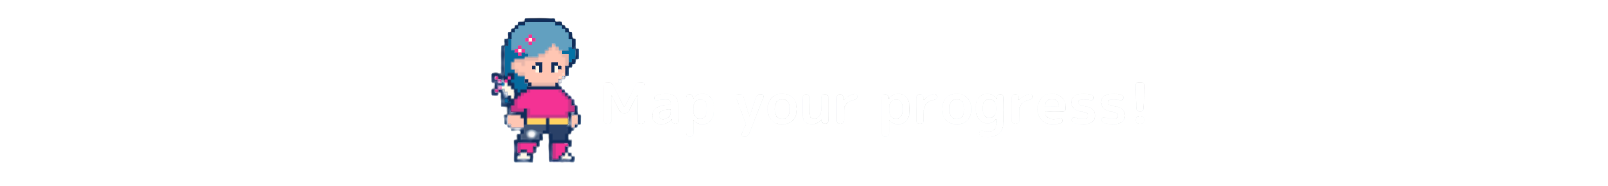

In [ ]:
print_formatted_tensor("sample_target_batch", sample_target_batch)

In [ ]:
# loaderインスタンスのdecodeメソッドを使って、サンプリングされた入力データのID文字列を文字に変換して返す
input_original_sentence = loader.decode(sample_input_batch[0].tolist())
print("input_original_sentence", input_original_sentence)

target_original_sentence = loader.decode(sample_target_batch[0].tolist())
print("\ntarget_original_sentence\n", target_original_sentence)

**Section 7: Define a Class** <label><input type="checkbox"> Mark as Done</label>

**Chapter 1: Dataloader Class** <label><input type="checkbox"> Mark as Done</label>